importamos las librerias necesarias.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

leemos y trabajamos con nuestro dataset

In [ ]:
df = pd.read_excel("/content/DATASETmusical.xlsx")
df.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,1.0,1.0,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,1.0,1.0,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,1.0,1.0,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,1.0,1.0,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,1.0,1.0,6.172597e+08


limpiamos las columnas categoricas y que no usaremos.

In [ ]:

limpiar_colum = ['Url_spotify', 'Uri', 'Url_youtube', 'Title', 'Description', "Channel", "Album", "Album_type" ]
df.drop(limpiar_colum, axis=1, inplace=True)

In [ ]:


df.head()

,Artist,Track,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,1.0,1.0,1.040235e+09
1,Gorillaz,Rhinestone Eyes,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,31003.0,1.0,1.0,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,7399.0,1.0,1.0,6.306347e+07
3,Gorillaz,On Melancholy Hill,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,211754952.0,1788577.0,55229.0,1.0,1.0,4.346636e+08
4,Gorillaz,Clint Eastwood,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,155930.0,1.0,1.0,6.172597e+08


imputamos los valores faltantes en las variables numericas con la mediana y eliminamos las columnas con pocos nulos (0,01%).

In [ ]:

df = df.dropna(subset=['Stream'])

columnas_con_pocos_nulos = [
    'Track', 'Danceability', 'Energy', 'Key', 'Loudness',
    'Speechiness', 'Acousticness', 'Instrumentalness',
    'Liveness', 'Valence', 'Tempo', 'Duration_ms'
]
df = df.dropna(subset=columnas_con_pocos_nulos)


columnas_numericas_imputar = ['Views', 'Likes', 'Comments']
for col in columnas_numericas_imputar:
    mediana = df[col].median()
    df[col] = df[col].fillna(mediana)


df['Licensed'] = df['Licensed'].fillna(df['Licensed'].mode()[0])
df['official_video'] = df['official_video'].fillna(df['official_video'].mode()[0])

print("Valores nulos después de la limpieza:")
print(df.isnull().sum())

Valores nulos después de la limpieza:
Artist              0
Track               0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
dtype: int64


Feature Engineering

In [ ]:


df['Youtube_Popularity'] = df['Views'] + df['Likes'] + df['Comments']

df['Like_per_View_Ratio'] = df['Likes'] / (df['Views'] + 1)

df['Acoustic_Danceability'] = df['Acousticness'] * df['Danceability']

print(f"Features creadas. Nueva forma del DataFrame: {df.shape}")

Features creadas. Nueva forma del DataFrame: (20139, 22)


Transformación logarítmica de los atributos que sesgan a los demas datos.

In [ ]:
# TRANSFORMACIÓN Y CREACIÓN DE TARGETS

# 1. transformamos Features Sesgadas (incluyendo las nuevas)
skewed_features = [
    'Duration_ms', 'Views', 'Likes', 'Comments',
    'Youtube_Popularity', 'Like_per_View_Ratio'
]

for col in skewed_features:
    df[col] = np.log1p(df[col])
    df.rename(columns={col: f'log_{col}'}, inplace=True)

# 2. crear Target para Parte 1 (Regresión)
df['log_stream'] = np.log1p(df['Stream'])

# 3. crear Target para Parte 2 (Clasificación)
# (usamos la columna 'Stream' original, antes del log)
stream_threshold = df['Stream'].quantile(0.80) # umbral del Top 20%
print(f"\nUmbral para 'Is_Hit' (Top 20%): {stream_threshold:,.0f} streams")
df['Is_Hit'] = (df['Stream'] >= stream_threshold).astype(int)

print("\nTargets 'log_stream' e 'Is_Hit' creados.")





Umbral para 'Is_Hit' (Top 20%): 176,372,030 streams

Targets 'log_stream' e 'Is_Hit' creados.


Definición del Conjunto de Entrenamiento y Prueba

In [ ]:

# 1. definir los 'y'
y_reg = df['log_stream']
y_class = df['Is_Hit']

# 2. definir 'X' (quitando targets y columnas fuente)
X = df.drop(
    ['Stream', 'log_stream', 'Is_Hit', 'Artist', 'Track'],
    axis=1,
    errors='ignore'
)

# 3. realizar el split maestro
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg,
    test_size=0.2,
    random_state=42
)

# 4. alinear los targets de Clasificación usando los índices del split
y_train_class = y_class.loc[X_train.index]
y_test_class = y_class.loc[X_test.index]

# 5. verificar los tamaños
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train_reg: {y_train_reg.shape}, y_test_reg: {y_test_reg.shape}")
print(f"y_train_class: {y_train_class.shape}, y_test_class: {y_test_class.shape}")

X_train: (16111, 19), X_test: (4028, 19)
y_train_reg: (16111,), y_test_reg: (4028,)
y_train_class: (16111,), y_test_class: (4028,)


Pipeline de Pre-procesamiento

In [ ]:
# PREPROCESSOR

# 1. definir las listas de columnas

# (añadimos las 3 nuevas features)
numeric_features = [
    'Danceability', 'Energy', 'Loudness', 'Speechiness',
    'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
    'log_Duration_ms', 'log_Views', 'log_Likes', 'log_Comments',
    'log_Youtube_Popularity', 'log_Like_per_View_Ratio',
    'Acoustic_Danceability'
]

categorical_features = ['Key', 'Licensed', 'official_video']

# 2. crear los transformadores
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# 3. unir los transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)


X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"\nForma de X_train procesado: {X_train_processed.shape}")
print(f"Forma de X_test procesado: {X_test_processed.shape}")


Forma de X_train procesado: (16111, 32)
Forma de X_test procesado: (4028, 32)


MODELOS DE REGRESIÓN

Evaluación de Modelos (Validación Cruzada K-Fold)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import time

# 1. definir Pipelines
pipe_lin_reg = Pipeline([('pre', preprocessor), ('model', LinearRegression())])
pipe_tree_reg = Pipeline([('pre', preprocessor), ('model', DecisionTreeRegressor(random_state=42))])
pipe_forest_reg = Pipeline([('pre', preprocessor), ('model', RandomForestRegressor(random_state=42, n_jobs=-1))])
pipe_svr_reg = Pipeline([('pre', preprocessor), ('model', LinearSVR(random_state=42, max_iter=5000))])
pipe_knn_reg = Pipeline([('pre', preprocessor), ('model', KNeighborsRegressor(n_jobs=-1))])

pipelines = [pipe_lin_reg, pipe_tree_reg, pipe_forest_reg, pipe_svr_reg, pipe_knn_reg]
model_names = ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest', 'Linear SVR', 'KNN (Regresión)']

# 2. ejecutar K-Fold para AMBAS métricas
print("K-Fold (Calculando RMSE y R²) ")

results = {}

for i, pipe in enumerate(pipelines):
    model_name = model_names[i]
    start_time = time.time()

    # calcular RMSE
    rmse_scores_raw = cross_val_score(
        pipe,
        X_train,
        y_train_reg,
        scoring='neg_mean_squared_error',
        cv=10,
        n_jobs=-1
    )
    rmse_scores = np.sqrt(-rmse_scores_raw)

    #calcular R²
    r2_scores = cross_val_score(
        pipe,
        X_train,
        y_train_reg,
        scoring='r2',
        cv=10,
        n_jobs=-1
    )

    end_time = time.time()

    # guardar resultados
    results[model_name] = {
        'mean_rmse': rmse_scores.mean(),
        'std_rmse': rmse_scores.std(),
        'mean_r2': r2_scores.mean(),
        'std_r2': r2_scores.std()
    }

    print(f"\nModelo: {model_name}")
    print(f"  RMSE (log) Promedio: {rmse_scores.mean():.4f} (std: {rmse_scores.std():.4f})")
    print(f"  R² (Precisión) Promedio: {r2_scores.mean():.4f} (std: {r2_scores.std():.4f})")
    print(f"  Tiempo: {end_time - start_time:.2f}s")

# 3. Resumen de Modelos (Ordenado por R²)
print("\n--- 🏆 RESUMEN (Ordenado por R² - Más Alto es Mejor) 🏆 ---")

sorted_kfold_results_r2 = sorted(results.items(), key=lambda item: -item[1]['mean_r2'])

for model, scores in sorted_kfold_results_r2:
    print(f"🥇 {model}: R² Promedio {scores['mean_r2']:.4f} (RMSE: {scores['mean_rmse']:.4f})")

K-Fold (Calculando RMSE y R²) 

Modelo: Regresión Lineal
  RMSE (log) Promedio: 1.2898 (std: 0.0213)
  R² (Precisión) Promedio: 0.3783 (std: 0.0192)
  Tiempo: 3.28s

Modelo: Árbol de Decisión
  RMSE (log) Promedio: 1.5634 (std: 0.0366)
  R² (Precisión) Promedio: 0.0850 (std: 0.0622)
  Tiempo: 11.11s

Modelo: Random Forest
  RMSE (log) Promedio: 1.1137 (std: 0.0208)
  R² (Precisión) Promedio: 0.5359 (std: 0.0269)
  Tiempo: 659.41s

Modelo: Linear SVR
  RMSE (log) Promedio: 1.2976 (std: 0.0213)
  R² (Precisión) Promedio: 0.3707 (std: 0.0212)
  Tiempo: 39.99s

Modelo: KNN (Regresión)
  RMSE (log) Promedio: 1.2810 (std: 0.0201)
  R² (Precisión) Promedio: 0.3867 (std: 0.0223)
  Tiempo: 5.00s

--- 🏆 RESUMEN (Ordenado por R² - Más Alto es Mejor) 🏆 ---
🥇 Random Forest: R² Promedio 0.5359 (RMSE: 1.1137)
🥇 KNN (Regresión): R² Promedio 0.3867 (RMSE: 1.2810)
🥇 Regresión Lineal: R² Promedio 0.3783 (RMSE: 1.2898)
🥇 Linear SVR: R² Promedio 0.3707 (RMSE: 1.2976)
🥇 Árbol de Decisión: R² Promedio 0.0850

Análisis del Modelo Ganador (Random Forest)

Entrenando el pipeline de Random Forest en todo X_train
Entrenamiento completado
 Análisis de Features (Random Forest) 
Las features más importantes según el Random Forest:
                    Feature  Importancia
11                log_Likes     0.356282
3               Speechiness     0.067860
10                log_Views     0.056069
13   log_Youtube_Popularity     0.053185
9           log_Duration_ms     0.050197
14  log_Like_per_View_Ratio     0.038837
2                  Loudness     0.038408
12             log_Comments     0.038274
6                  Liveness     0.033912
7                   Valence     0.033808
0              Danceability     0.033783
1                    Energy     0.032672
8                     Tempo     0.032230
4              Acousticness     0.029859
15    Acoustic_Danceability     0.029052
5          Instrumentalness     0.021883
31       official_video_1.0     0.015670
30       official_video_0.0     0.008700
26                 Key_10.0     0.002968
17     

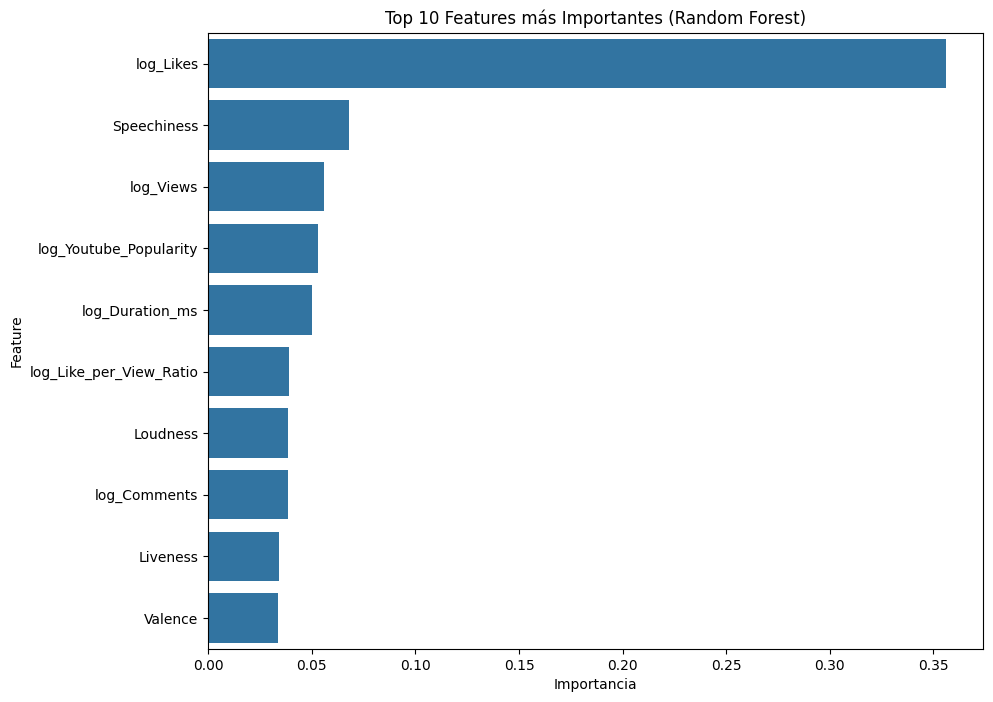

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# 1. entrenar el Pipeline Ganador (Random Forest)
# lo entrenamos en TODO el set X_train para ver sus features
print("Entrenando el pipeline de Random Forest en todo X_train")
pipe_forest_reg.fit(X_train, y_train_reg)
print("Entrenamiento completado")

#  2. Extraer la Importancia de Features
preprocessor_fitted = pipe_forest_reg.named_steps['pre']
model_fitted = pipe_forest_reg.named_steps['model']

# obtener los nombres de las features (incluyendo las creadas por OneHotEncoder)
numeric_features_list = preprocessor_fitted.transformers_[0][2]
categorical_features_list = preprocessor_fitted.transformers_[1][1].get_feature_names_out(
    preprocessor_fitted.transformers_[1][2]
)
all_feature_names = list(numeric_features_list) + list(categorical_features_list)

# obtener las importancias del Random Forest
importances = model_fitted.feature_importances_

# crear un dataframe para analizar
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

print(" Análisis de Features (Random Forest) ")
print("Las features más importantes según el Random Forest:")
print(feature_importance_df.head(20))

# 3. Graficar las 10 features más importantes
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importancia',
    y='Feature',
    data=feature_importance_df.head(10)
)
plt.title('Top 10 Features más Importantes (Random Forest)')
plt.show()

luego de este paso, nos sorprendió ver a "likes" como la caracteristica más importante según el random forest, ya que, en base a lo que pudimos analizar y determinar al realizar el EDA, esperabamos que las caracteristicas más importantes sean las variables tecnica-musicales como "danceability", "energy" o "valence".

Ajuste Fino del modelo Ganador

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# AJUSTE FINO (con RANDOMIZEDSEARCH)

# 1. definir hiperparámetros a explorar
# (estos son para "model" dentro de nuestro pipeline)
param_dist = {
    # "model__" es la sintaxis para acceder a los parámetros del modelo DENTRO del pipeline
    'model__n_estimators': [100, 200, 300], # Número de árboles
    'model__max_features': [1.0, 'sqrt', 'log2'], # Features por split
    'model__max_depth': [None, 10, 20, 30],   # Profundidad
    'model__min_samples_split': [2, 5, 10],   # Mínimo para dividir
    'model__min_samples_leaf': [1, 2, 4]      # Mínimo en una hoja
}

# 2. configurar la búsqueda aleatoria (RandomizedSearch)
# (usaremos el 'pipe_forest_reg' como estimador base)
# n_iter=10: prueba 10 combinaciones (es rápido)
# cv=3: validación cruzada de 3 folds (más rápido que 10)
print("Iniciando Ajuste Fino (RandomizedSearch)")
start_time = time.time()

rnd_search = RandomizedSearchCV(
    pipe_forest_reg,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

# 3. entrenar el modelo de búsqueda
# (se entrena con los datos de ENTRENAMIENTO)
rnd_search.fit(X_train, y_train_reg)

print(f"Búsqueda completada en {time.time() - start_time:.2f}s\n")

# 4. mostrar los mejores parámetros encontrados
print("Mejores Hiperparámetros encontrados")
print(rnd_search.best_params_)

Iniciando Ajuste Fino (RandomizedSearch)
Búsqueda completada en 435.12s

Mejores Hiperparámetros encontrados
{'model__n_estimators': 300, 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_features': 1.0, 'model__max_depth': 30}


In [ ]:
# --- 🕵️‍♂️ CELDA DE VERIFICACIÓN ---
print(f"--- Verificando 'Danceability' ---")
print(f"Tipo de dato: {df['Danceability'].dtype}")
print(f"Valores únicos: {df['Danceability'].nunique()}")
print("\nValores más comunes:")
print(df['Danceability'].value_counts().head(5))

--- Verificando 'Danceability' ---
Tipo de dato: float64
Valores únicos: 897

Valores más comunes:
Danceability
0.687    76
0.671    71
0.647    68
0.682    66
0.626    65
Name: count, dtype: int64


Evaluación Final del modelo

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# 1. extraer el mejor modelo encontrado por RandomizedSearch
final_model = rnd_search.best_estimator_

# 2. predecir en el set de PRUEBA (X_test)
y_pred_log_final = final_model.predict(X_test)

# 3. calcular Métricas Finales
log_rmse_final = np.sqrt(mean_squared_error(y_test_reg, y_pred_log_final))
r2_final = r2_score(y_test_reg, y_pred_log_final)

# 4. calcular RMSE en escala original (en Streams)
y_test_orig = np.expm1(y_test_reg)
y_pred_orig_final = np.expm1(y_pred_log_final)
final_rmse_streams = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig_final))

print(" RESULTADO FINAL (REGRESIÓN) ")
print(f"Modelo Ganador: Random Forest (Ajustado)")

print(f"R² (Coef. de Determinación): {r2_final:.4f}")
print(f"RMSE (log): {log_rmse_final:.4f}")
print(f"\nRMSE (Interpretado): {final_rmse_streams:,.0f} streams")

 RESULTADO FINAL (REGRESIÓN) 
Modelo Ganador: Random Forest (Ajustado)
R² (Coef. de Determinación): 0.5338
RMSE (log): 1.1519

RMSE (Interpretado): 168,104,244 streams


In [ ]:
# --- 🕵️‍♂️ CELDA DE VERIFICACIÓN ---
print(f"--- Verificando 'Danceability' ---")
print(f"Tipo de dato: {df['Danceability'].dtype}")
print(f"Valores únicos: {df['Danceability'].nunique()}")
print("\nValores más comunes:")
print(df['Danceability'].value_counts().head(5))

--- Verificando 'Danceability' ---
Tipo de dato: float64
Valores únicos: 897

Valores más comunes:
Danceability
0.687    76
0.671    71
0.647    68
0.682    66
0.626    65
Name: count, dtype: int64


¡Haciendo una Predicción Real! con el modelo final de randomforest

In [ ]:
import numpy as np
import pandas as pd

# (Configuración para que pandas muestre números grandes sin notación científica)
#pd.set_option('display.float_format', lambda x: f'{x:,.0f}')

# --- 1. Elegir una Canción de Prueba ---
# (Vamos a elegir la canción en la fila 15 de nuestro set de prueba)
indice_cancion = 212
cancion_para_predecir = X_test.iloc[indice_cancion:indice_cancion+1]

print("FEATURES DE LA CANCIÓN DE PRUEBA")
# Usamos .T (Transponer) para que se muestre como una lista vertical
print(cancion_para_predecir.T)


# --- 2. Obtener la Respuesta REAL (para comparar) ---
# (Buscamos la respuesta en nuestro 'y_test' usando el índice)
real_log_stream = y_test_reg.iloc[indice_cancion]
real_streams = np.expm1(real_log_stream)


# --- 3. ¡Usar el Modelo para PREDECIR! ---
# (Usamos 'final_model', el RandomForest Ajustado de la Celda 9)
pred_log_stream = final_model.predict(cancion_para_predecir)

# (Convertimos la predicción logarítmica de vuelta a 'streams')
pred_streams = np.expm1(pred_log_stream[0])


# --- 4. Mostrar el Resultado Final ---
print("\n--- 🔮 ¡RESULTADO DE LA PREDICCIÓN! 🔮 ---")
print(f"Modelo (Random Forest Ajustado) predice: {pred_streams:,.0f} streams")
print(f"La canción REALMENTE tuvo:                {real_streams:,.0f} streams")
print("--------------------------------------------------")

error = abs(pred_streams - real_streams)
print(f"Error en esta predicción específica: {error:,.0f} streams")

FEATURES DE LA CANCIÓN DE PRUEBA
                              13474
Danceability               0.331000
Energy                     0.341000
Key                        9.000000
Loudness                  -6.057000
Speechiness                0.030900
Acousticness               0.528000
Instrumentalness           0.000000
Liveness                   0.109000
Valence                    0.152000
Tempo                    109.821000
log_Duration_ms           12.563523
log_Views                 14.385067
log_Likes                 10.485033
log_Comments               6.533789
Licensed                   0.000000
official_video             0.000000
log_Youtube_Popularity    14.405486
log_Like_per_View_Ratio    0.020039
Acoustic_Danceability      0.174768

--- 🔮 ¡RESULTADO DE LA PREDICCIÓN! 🔮 ---
Modelo (Random Forest Ajustado) predice: 37,176,381 streams
La canción REALMENTE tuvo:                345,671,408 streams
--------------------------------------------------
Error en esta predicción específ

Conclusión B - Preparación:
En esta celda, creamos un nuevo conjunto de datos (X_train_musica) y un nuevo preprocesador (preprocessor_musica) que excluyen las caracts. "tramposas" que le ayudan, por así decirlo, al modelo (las de popularidad, como "likes", "comments", "like_per_view_ratio", entre otras).

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

print(" Iniciando Conclusión B")
print("Preparando datos 'solo musicales'...")

# 1. definir las 'features tramposas' (las que vamos a eliminar)
leaky_features = [
    'log_Views',
    'log_Likes',
    'log_Comments',
    'log_Youtube_Popularity',
    'log_Like_per_View_Ratio'
]

# 2. crear los nuevos DataFrames de entrenamiento y prueba (X)
# (eliminamos esas 5 columnas de los sets que ya teníamos)
X_train_musica = X_train.drop(columns=leaky_features)
X_test_musica = X_test.drop(columns=leaky_features)

print(f"Forma original de X_train: {X_train.shape}")
print(f"Forma nueva de X_train_musica: {X_train_musica.shape}")

# 3. crear el nuevo Preprocessor (para las caracts. musicales)

# lista de caracts. numéricas (sin las caracts "trampsosas")
numeric_features_musica = [
    'Danceability', 'Energy', 'Loudness', 'Speechiness',
    'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
    'log_Duration_ms',
    'Acoustic_Danceability'
]

# las categóricas siguen siendo las mismas
categorical_features_musica = ['Key', 'Licensed', 'official_video']

# 4. crear el preprocessor "preprocessor_musica"
preprocessor_musica = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_musica),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_musica)
    ],
    remainder='passthrough'
)

# 5. verificar que funciona
X_train_musica_processed = preprocessor_musica.fit_transform(X_train_musica)
print(f"\nForma de X_train_musica procesado: {X_train_musica_processed.shape}")
print("¡Datos y preprocesador del 'Experimento B' listos!")

 Iniciando Conclusión B
Preparando datos 'solo musicales'...
Forma original de X_train: (16111, 19)
Forma nueva de X_train_musica: (16111, 14)

Forma de X_train_musica procesado: (16111, 27)
¡Datos y preprocesador del 'Experimento B' listos!


Conclusión B - K-Fold de Modelos "musicales"
ahora que tenemos los datos "solo musicales", repetimos el Paso 6 (K-Fold) para ver cuál es el mejor modelo en este nuevo escenario. ¿sigue siendo Random Forest?

In [ ]:


#  1. crear los Pipelines (Preprocesador_Musica + modelo)

# (usamos el "preprocessor_musica" que creamos antes)
pipe_lin_reg_musica = Pipeline([
    ('pre', preprocessor_musica),
    ('model', LinearRegression())
])

pipe_tree_reg_musica = Pipeline([
    ('pre', preprocessor_musica),
    ('model', DecisionTreeRegressor(random_state=42))
])

pipe_forest_reg_musica = Pipeline([
    ('pre', preprocessor_musica),
    ('model', RandomForestRegressor(random_state=42, n_jobs=-1))
])

pipe_svr_reg_musica = Pipeline([
    ('pre', preprocessor_musica),
    ('model', LinearSVR(random_state=42, max_iter=5000))
])

pipelines_musica = [
    pipe_lin_reg_musica,
    pipe_tree_reg_musica,
    pipe_forest_reg_musica,
    pipe_svr_reg_musica
]
model_names = ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest', 'Linear SVR']

# 2. ejecutar la Validación Cruzada (K-Fold)
print("K-Fold (Experimento B: Solo Música)")
print("Evaluando modelos sin features de popularidad...")

results_musica = {}

for i, pipe in enumerate(pipelines_musica):
    start_time = time.time()

    # (usamos los mismos y_train_reg que antes)
    scores = cross_val_score(
        pipe,
        X_train_musica,
        y_train_reg,
        scoring='neg_mean_squared_error',
        cv=10,
        n_jobs=-1
    )

    end_time = time.time()
    rmse_scores = np.sqrt(-scores)

    results_musica[model_names[i]] = {
        'mean_rmse': rmse_scores.mean(),
        'std_rmse': rmse_scores.std()
    }

    print(f"\nModelo: {model_names[i]}")
    print(f"  RMSE (log) Promedio: {rmse_scores.mean():.4f}")
    print(f"  Desviación Estándar (std): {rmse_scores.std():.4f}")
    print(f"  Tiempo: {end_time - start_time:.2f}s")

# 3. resumen de modelos
print(" RESUMEN (Experimento B: solo caracts. Musicales)")
sorted_kfold_results = sorted(results_musica.items(), key=lambda item: item[1]['mean_rmse'])

for model, scores in sorted_kfold_results:
    print(f"🥇 {model}: RMSE Promedio {scores['mean_rmse']:.4f} (std: {scores['std_rmse']:.4f})")

print("Comparación")
print(f"Mejor RMSE (Modelo A, con 'Likes'): 1.1137")
print(f"Mejor RMSE (Modelo B, solo música): {sorted_kfold_results[0][1]['mean_rmse']:.4f}")

K-Fold (Experimento B: Solo Música)
Evaluando modelos sin features de popularidad...

Modelo: Regresión Lineal
  RMSE (log) Promedio: 1.5775
  Desviación Estándar (std): 0.0302
  Tiempo: 0.42s

Modelo: Árbol de Decisión
  RMSE (log) Promedio: 2.0948
  Desviación Estándar (std): 0.0397
  Tiempo: 3.83s

Modelo: Random Forest
  RMSE (log) Promedio: 1.4708
  Desviación Estándar (std): 0.0245
  Tiempo: 255.49s

Modelo: Linear SVR
  RMSE (log) Promedio: 1.5844
  Desviación Estándar (std): 0.0303
  Tiempo: 2.65s
 RESUMEN (Experimento B: solo caracts. Musicales)
🥇 Random Forest: RMSE Promedio 1.4708 (std: 0.0245)
🥇 Regresión Lineal: RMSE Promedio 1.5775 (std: 0.0302)
🥇 Linear SVR: RMSE Promedio 1.5844 (std: 0.0303)
🥇 Árbol de Decisión: RMSE Promedio 2.0948 (std: 0.0397)
Comparación
Mejor RMSE (Modelo A, con 'Likes'): 1.1137
Mejor RMSE (Modelo B, solo música): 1.4708


Análisis de Features "Musicales"

Entrenando el pipeline 'B' (Solo Música)
entrenamiento listo
Análisis de Features (Modelo B: Solo Música)
¡Las features musicales más importantes para predecir el éxito!
                  Feature  Importance
3             Speechiness    0.127065
9         log_Duration_ms    0.115341
2                Loudness    0.088657
7                 Valence    0.084426
8                   Tempo    0.080877
0            Danceability    0.080606
1                  Energy    0.077759
6                Liveness    0.077639
4            Acousticness    0.063866
5        Instrumentalness    0.061667
10  Acoustic_Danceability    0.060570
12                Key_1.0    0.006576
22               Key_11.0    0.006123
11                Key_0.0    0.006057
13                Key_2.0    0.006053
18                Key_7.0    0.006049
20                Key_9.0    0.005824
21               Key_10.0    0.005753
17                Key_6.0    0.005730
16                Key_5.0    0.005641


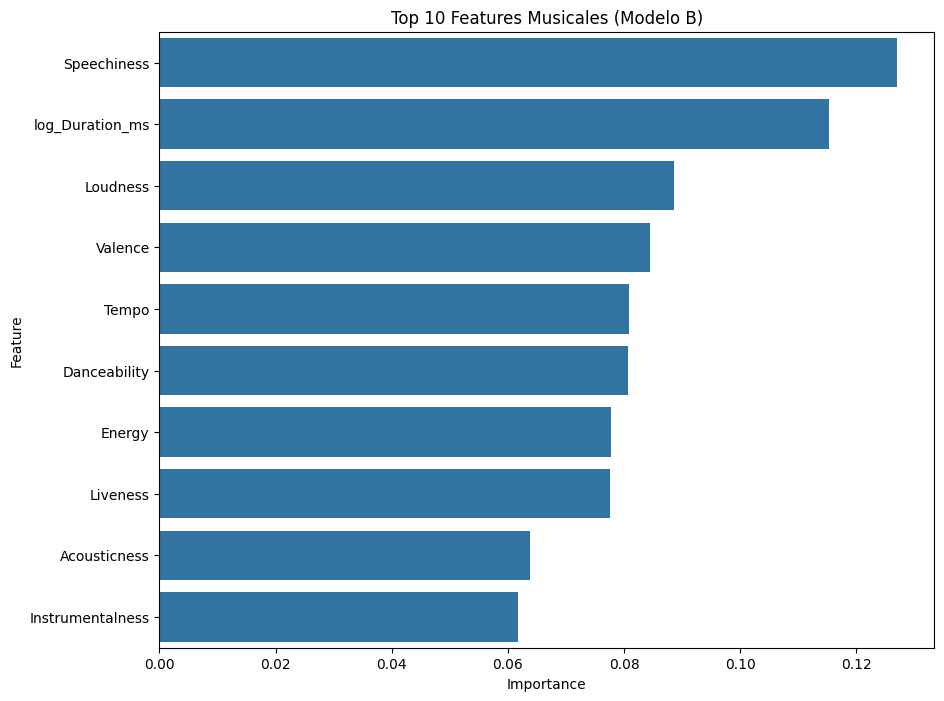

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Entrenar el Pipeline Ganador (Random Forest 'B')
# (usamos 'pipe_forest_reg_musica' en todo X_train_musica)
print("Entrenando el pipeline 'B' (Solo Música)")
# (esto tardará unos minutos)
pipe_forest_reg_musica.fit(X_train_musica, y_train_reg)
print("entrenamiento listo")

#2. extraer la Importancia de Features
preprocessor_fitted_musica = pipe_forest_reg_musica.named_steps['pre']
model_fitted_musica = pipe_forest_reg_musica.named_steps['model']

# obtener los nombres de las features del "preprocessor_musica"
numeric_features_list = preprocessor_fitted_musica.transformers_[0][2]
categorical_features_list = preprocessor_fitted_musica.transformers_[1][1].get_feature_names_out(
    preprocessor_fitted_musica.transformers_[1][2]
)
all_feature_names_musica = list(numeric_features_list) + list(categorical_features_list)

# obtener las importancias
importances = model_fitted_musica.feature_importances_

# crear un dataframe para analizar
feature_importance_df_musica = pd.DataFrame({
    'Feature': all_feature_names_musica,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Análisis de Features (Modelo B: Solo Música)")
print("¡Las features musicales más importantes para predecir el éxito!")
print(feature_importance_df_musica.head(20))

# 3. graficar las 10 features más importantes
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df_musica.head(10)
)
plt.title('Top 10 Features Musicales (Modelo B)')
plt.show()

Conclusión Modelo A: El mejor predictor para la popularidad en Spotify (log_stream) es, por lejos, la popularidad existente en YouTube (log_Likes). Este modelo es el más preciso (RMSE 1.11) pero es "obvio", ya que ("lo popular es popular").

Conclusión Modelo B: Si forzamos al modelo a actuar como un "crítico musical" (sin las features de popularidad), el factor más importante para predecir el éxito no es solo "Danceability" o "Energy", sino un conjunto de "Speechiness" (si es música o habla), "Duration_ms" (la duración de la pista) y "Loudness" (el volumen de producción).

conclusión alternativa - Regresión por tramos

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

print("--- 🔬 Iniciando Conclusión Experta (Regresión por Tramos) ---")

# --- 1. Preparar los Datos para los Tramos ---
X_train_tramos = X_train.copy()
y_train_original_stream = df['Stream'].loc[X_train.index]
X_train_tramos['Stream'] = y_train_original_stream

# --- 2. Definir los Tramos (Bins) ---
bins = [
    -1, 100000, 1000000, 10000000, 100000000, 1000000000, np.inf
]
bin_labels = [
    '1_Alcance_Bajo', '2_Popular', '3_Exito_Relativo',
    '4_Exito_Importante', '5_Exito_Global', '6_Fenomeno_Mundial'
]
X_train_tramos['Tramo'] = pd.cut(
    X_train_tramos['Stream'], bins=bins, labels=bin_labels, right=True
)

print("\nDistribución de canciones por tramo:")
print(X_train_tramos['Tramo'].value_counts().sort_index())

# --- 3. Entrenar un Modelo Especialista por cada Tramo ---
print("\n--- Entrenando Modelos Especialistas ---")
modelos_especialistas = {}
resultados_tramos = {}

for tramo in bin_labels:
    print(f"\n--- Tramo: {tramo} ---")

    # 1. Aislar los datos de este tramo
    X_tramo_completo = X_train_tramos[X_train_tramos['Tramo'] == tramo]
    y_tramo = y_train_reg.loc[X_tramo_completo.index]

    if len(X_tramo_completo) < 50:
        print(f"Saltando tramo (muy pocas muestras: {len(X_tramo_completo)})")
        continue

    # <-- INICIO DE LA CORRECCIÓN ---
    # 2. Crear el DataFrame de features (X) quitando las columnas helper
    X_tramo_features = X_tramo_completo.drop(columns=['Stream', 'Tramo'])
    # --- FIN DE LA CORRECCIÓN ---

    # 3. Crear y entrenar el pipeline
    pipe_especialista = Pipeline([
        ('pre', preprocessor),
        ('model', LinearRegression())
    ])

    # <-- CORRECCIÓN: Usar X_tramo_features ---
    pipe_especialista.fit(X_tramo_features, y_tramo)

    # 4. Guardar el modelo
    modelos_especialistas[tramo] = pipe_especialista

    # 5. Evaluar (en sus propios datos de entrenamiento)
    # <-- CORRECCIÓN: Usar X_tramo_features ---
    y_pred_tramo = pipe_especialista.predict(X_tramo_features)
    r2_tramo = r2_score(y_tramo, y_pred_tramo)
    rmse_tramo = np.sqrt(mean_squared_error(y_tramo, y_pred_tramo))

    resultados_tramos[tramo] = {'R2': r2_tramo, 'RMSE (log)': rmse_tramo}

    print(f"Muestras: {len(X_tramo_completo)}")
    print(f"R² (en este tramo): {r2_tramo:.4f}")
    print(f"RMSE (en este tramo): {rmse_tramo:.4f}")

# --- 4. Resumen del Experimento ---
print("\n--- 🏆 RESUMEN (Regresión por Tramos) 🏆 ---")
print(f"R² (Modelo Generalista RF - Pista 1): 0.5338") # (El resultado de tu Celda 9)
print("\nR² (Modelos Especialistas - Pista 1.B):")
for tramo, res in resultados_tramos.items():
    print(f"  🥇 {tramo}: R² = {res['R2']:.4f}")

--- 🔬 Iniciando Conclusión Experta (Regresión por Tramos) ---

Distribución de canciones por tramo:
Tramo
1_Alcance_Bajo          46
2_Popular              254
3_Exito_Relativo      2226
4_Exito_Importante    8411
5_Exito_Global        4870
6_Fenomeno_Mundial     304
Name: count, dtype: int64

--- Entrenando Modelos Especialistas ---

--- Tramo: 1_Alcance_Bajo ---
Saltando tramo (muy pocas muestras: 46)

--- Tramo: 2_Popular ---
Muestras: 254
R² (en este tramo): 0.2914
RMSE (en este tramo): 0.5562

--- Tramo: 3_Exito_Relativo ---
Muestras: 2226
R² (en este tramo): 0.0879
RMSE (en este tramo): 0.5927

--- Tramo: 4_Exito_Importante ---
Muestras: 8411
R² (en este tramo): 0.0799
RMSE (en este tramo): 0.6072

--- Tramo: 5_Exito_Global ---
Muestras: 4870
R² (en este tramo): 0.1494
RMSE (en este tramo): 0.5574

--- Tramo: 6_Fenomeno_Mundial ---
Muestras: 304
R² (en este tramo): 0.1913
RMSE (en este tramo): 0.2105

--- 🏆 RESUMEN (Regresión por Tramos) 🏆 ---
R² (Modelo Generalista RF - Pista 1)

MODELOS DE CLASIFICACIÓN

Verificación del Target:
Antes de modelar, debemos verificar el balance de nuestro target de clasificación.
¿tenemos un 50/50 de éxitos y no éxitos, o está desbalanceado?

Distribución de Clases en el Set de Entrenamiento:
Is_Hit
0    79.988828
1    20.011172
Name: proportion, dtype: float64


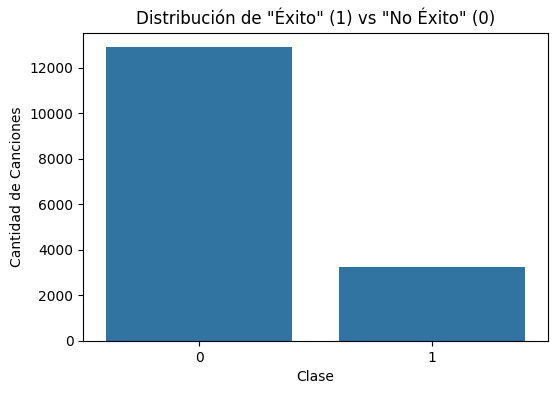

In [ ]:


# contar los valores de 'y_train_class' (nuestro target)
class_distribution = y_train_class.value_counts(normalize=True) * 100

print("Distribución de Clases en el Set de Entrenamiento:")
print(class_distribution)

# graficar la distribución
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_class)
plt.title('Distribución de "Éxito" (1) vs "No Éxito" (0)')
plt.ylabel('Cantidad de Canciones')
plt.xlabel('Clase')
plt.show()

este desbalance es el porque no podemos usar "Accuracy" (exactitud) como nuestra métrica de éxito. Un modelo que simplemente adivine "0" (No Éxito) todo el tiempo tendría un 80% de accuracy, pero sería completamente inútil.

Por eso, la métrica que vamos a usar en el siguiente paso es el F1-Score (una media armónica de Precisión y Recall), ya que está diseñado específicamente para datasets desbalanceados y nos dirá qué tan bien el modelo identifica a la minoria (los"Éxitos").

K-Fold de Modelos de Clasificación

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# 1. crear los Pipelines (Preprocesador + Modelo de Clasificación)
# (usamos el mismo "preprocessor" que usamos antes)

# pipeline para Regresión Logística
pipe_log_class = Pipeline([
    ('pre', preprocessor),
    ('model', LogisticRegression(random_state=42, max_iter=1000))
])

# pipeline para Árbol de Decisión (Clasificador)
pipe_tree_class = Pipeline([
    ('pre', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])

# pipeline para Random Forest (Clasificador)
pipe_forest_class = Pipeline([
    ('pre', preprocessor),
    ('model', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# (no usamos SVR, porque LogisticRegression es el lineal estándar)
pipelines = [pipe_log_class, pipe_tree_class, pipe_forest_class]
model_names = ['Regresión Logística', 'Árbol de Decisión (Class)', 'Random Forest (Class)']

# 2. ejecutar la Validación Cruzada (K-Fold)
print("Iniciando K-Fold (PISTA 2: Clasificación)")
print("Usando métrica: F1-Score (macro)")

results_class = {}

for i, pipe in enumerate(pipelines):
    start_time = time.time()

    # (usamos cv=10, pero "scoring" ahora es "f1_macro")
    scores = cross_val_score(
        pipe,
        X_train,
        y_train_class,
        scoring='f1_macro',
        cv=10,
        n_jobs=-1
    )

    end_time = time.time()

    results_class[model_names[i]] = {
        'mean_f1': scores.mean(),
        'std_f1': scores.std()
    }

    print(f"\nModelo: {model_names[i]}")
    print(f"  F1-Score (macro) Promedio: {scores.mean():.4f}")
    print(f"  Desviación Estándar (std): {scores.std():.4f}")
    print(f"  Tiempo: {end_time - start_time:.2f}s")

# 3. resumen de Modelos
print("RESUMEN (K-Fold - Clasificación)")
# ordenar por el mejor F1-Score (mas alto)
sorted_kfold_results = sorted(results_class.items(), key=lambda item: -item[1]['mean_f1'])

for model, scores in sorted_kfold_results:
    print(f"🥇 {model}: F1-Score Promedio {scores['mean_f1']:.4f} (std: {scores['std_f1']:.4f})")

Iniciando K-Fold (PISTA 2: Clasificación)
Usando métrica: F1-Score (macro)

Modelo: Regresión Logística
  F1-Score (macro) Promedio: 0.7115
  Desviación Estándar (std): 0.0154
  Tiempo: 0.54s

Modelo: Árbol de Decisión (Class)
  F1-Score (macro) Promedio: 0.7141
  Desviación Estándar (std): 0.0095
  Tiempo: 5.04s

Modelo: Random Forest (Class)
  F1-Score (macro) Promedio: 0.7848
  Desviación Estándar (std): 0.0161
  Tiempo: 47.38s
RESUMEN (K-Fold - Clasificación)
🥇 Random Forest (Class): F1-Score Promedio 0.7848 (std: 0.0161)
🥇 Árbol de Decisión (Class): F1-Score Promedio 0.7141 (std: 0.0095)
🥇 Regresión Logística: F1-Score Promedio 0.7115 (std: 0.0154)


Aunque el Random Forest ofrece un 7% más de "rendimiento", el Árbol de Decisión es el modelo más estable (std: 0.0095 VS std: 0.0161),ofrece una interpretabilidad completa ("caja blanca"), fundamental para el análisis.
  Es por esto, que el modelo elegido para clasificación es el Árbol de Decisión.

Análisis de Features del ÁRBOL DE DECISIÓN

Entrenando el pipeline 'Árbol de Decisión (Class)'
Entrenamiento completado
Análisis de Features (Árbol de Decisión)
Las features más importantes para el Árbol:
                    Feature  Importance
11                log_Likes    0.339172
9           log_Duration_ms    0.057586
6                  Liveness    0.049814
12             log_Comments    0.048050
15    Acoustic_Danceability    0.047821
8                     Tempo    0.046674
3               Speechiness    0.046291
13   log_Youtube_Popularity    0.044447
14  log_Like_per_View_Ratio    0.043715
7                   Valence    0.041916
2                  Loudness    0.041534
0              Danceability    0.038198
1                    Energy    0.034380
4              Acousticness    0.031356
10                log_Views    0.021937
5          Instrumentalness    0.021187
25                  Key_9.0    0.004843
31       official_video_1.0    0.004586
27                 Key_11.0    0.004538
21                  Key_5.0    0.004318

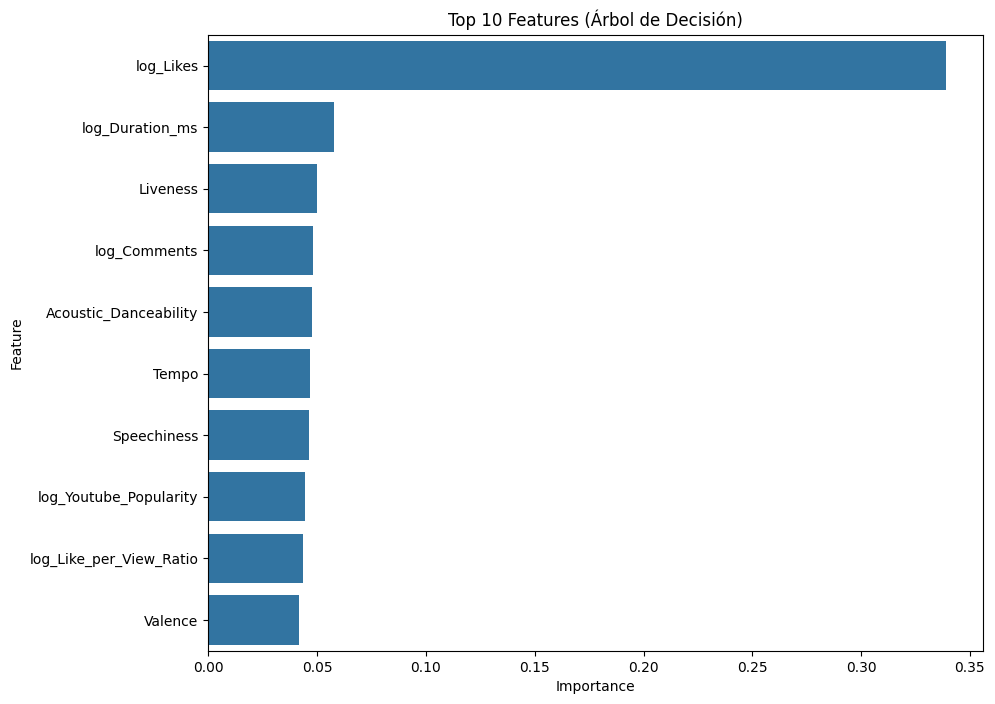

In [ ]:
# 1. entrenar el Pipeline Ganador (Árbol de Decisión)
# (usamos 'pipe_tree_class' que ya definimos)
print("Entrenando el pipeline 'Árbol de Decisión (Class)'")
pipe_tree_class.fit(X_train, y_train_class)
print("Entrenamiento completado")

#2. extraer la Importancia de Features
preprocessor_fitted = pipe_tree_class.named_steps['pre']
model_fitted = pipe_tree_class.named_steps['model']

# obtener los nombres de las features
numeric_features_list = preprocessor_fitted.transformers_[0][2]
categorical_features_list = preprocessor_fitted.transformers_[1][1].get_feature_names_out(
    preprocessor_fitted.transformers_[1][2]
)
all_feature_names = list(numeric_features_list) + list(categorical_features_list)

# obtener las importancias del Árbol de Decisión
importances = model_fitted.feature_importances_

# crear un DataFrame para analizar
feature_importance_df_class = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Análisis de Features (Árbol de Decisión)")
print("Las features más importantes para el Árbol:")
print(feature_importance_df_class.head(20))

# 3. Graficar las 10 features más importantes
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df_class.head(10)
)
plt.title('Top 10 Features (Árbol de Decisión)')
plt.show()

Análisis de los Resultados:
el rey sigue siendo log_Likes (33.9%): como en la Regresión anteriormente analizada, la popularidad en YouTube (log_Likes) sigue siendo la señal dominante. El Árbol de Decisión aprendió que la pregunta más importante para separar un "Éxito" de un "No Éxito" es: "¿Cuántos likes tiene esta canción?".

Aparecen otros protagonistas: a diferencia del Random Forest (que se fijó en Speechiness), el Árbol de Decisión encontró que el segundo y tercer factor más importantes son: "log_Duration_ms" (5.7%): La duración de la canción y "Liveness" (4.9%): Qué tan "en vivo" suena la canción.

Las caracteristicas pronosticadas en el EDA como las "importantes" (Energy, Danceability, etc.), y todas las variables tecnico-musicales (Tempo, Valence, Speechiness, Loudness) están agrupadas, aportando entre un 3% y un 5% cada una. lo que significa que el árbol las usa a todas, pero para tomar decisiones más "finas" después de haber preguntado por los likes, la duración y que tan "en vivo" es la canción.

Descubrimiento Clave: (log_Views es casi inútil), log_Views está más por debajo (2.1%). El modelo está diciendo que log_Likes (33.9%) y las features de ingeniería (log_Youtube_Popularity, 4.4%) ya capturan toda esa información. como conclusión, el Árbol decidió que los Likes son una señal de "éxito" mucho más pura que las Vistas.

Ajuste Fino del Árbol de Decisión

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, r2_score, accuracy_score, classification_report, confusion_matrix

# 1. definir la "parrilla" de hiperparámetros a explorar
# (específicos para DecisionTreeClassifier)
param_dist = {

    'model__criterion': ['gini', 'entropy'], # función para medir la calidad de un split
    'model__max_depth': [None, 5, 10, 20, 30],   # profundidad máxima
    'model__min_samples_split': [2, 5, 10, 20],   # mínimo para dividir un nodo
    'model__min_samples_leaf': [1, 2, 4, 8, 16]   # mínimo en una hoja final
}

# 2. configurar la Búsqueda Aleatoria (RandomizedSearch)
# (usamos el "pipe_tree_class" como estimador base)
# n_iter=20: probamos 20 combinaciones (los árboles son rápidos, podriamos probar más)
# cv=5: validación cruzada de 5 folds
# scoring='f1_macro': nuestra métrica de éxito
print("Iniciando Ajuste Fino (Árbol de Decisión) ")
start_time = time.time()

rnd_search_class = RandomizedSearchCV(
    pipe_tree_class,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1
)

# 3. entrenar el modelo de búsqueda
# (se entrena sobre los datos de ENTRENAMIENTO y el target de CLASIFICACIÓN)
rnd_search_class.fit(X_train, y_train_class)

print(f"Búsqueda completada en {time.time() - start_time:.2f}s\n")

# 4. mostrar los mejores parámetros encontrados
print("mejores Hiperparámetros encontrados:")
print(rnd_search_class.best_params_)

Iniciando Ajuste Fino (Árbol de Decisión) 
Búsqueda completada en 33.70s

mejores Hiperparámetros encontrados:
{'model__min_samples_split': 2, 'model__min_samples_leaf': 4, 'model__max_depth': 5, 'model__criterion': 'entropy'}


Análisis de los Hiperparámetros
lo que el RandomizedSearch descubrió:

'model__max_depth': 5: hallazgo importante, el árbol por defecto (max_depth=None) crece sin control, memorizando los datos (alto overfitting). la búsqueda descubrió que el mejor modelo es uno muy corto y simple, con solo 5 niveles de "preguntas". Esto lo fuerza a generalizar y ser más robusto.

'model__min_samples_leaf': 4: cada "hoja" (una predicción final) debe estar basada en al menos 4 canciones. Esto previene el overfitting.

'model__criterion': 'entropy': una fórmula matemática diferente a 'gini' (la otra opción) para decidir la mejor "pregunta" en cada paso.

conclusión: el mejor modelo es un árbol simple, robusto y rápido.

Evaluación Final (Árbol de Decisión Ajustado)

RESULTADO FINAL (CLASIFICACIÓN)
Modelo Ganador: Árbol de Decisión (Ajustado)
Accuracy (Exactitud): 86.37%
F1-Score (macro): 0.7593
Comparación de F1-Score
F1 Modelo Base (K-Fold): 0.7141
F1 Modelo Ajustado: 0.7593
Reporte de Clasificación Detallado
              precision    recall  f1-score   support

No Éxito (0)       0.89      0.95      0.92      3224
   Éxito (1)       0.72      0.51      0.60       804

    accuracy                           0.86      4028
   macro avg       0.81      0.73      0.76      4028
weighted avg       0.85      0.86      0.85      4028

Matriz de Confusión


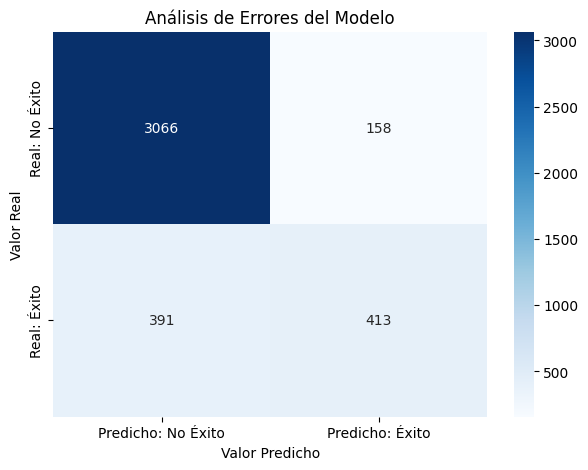

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# 1. extraer el mejor modelo encontrado por RandomizedSearch
final_model_class = rnd_search_class.best_estimator_

# 2. predecir en el set de PRUEBA (X_test)
# (usamos el X_test original y el modelo hará el preprocesamiento)
y_pred_final_class = final_model_class.predict(X_test)

# 3. calcular Métricas Finales
# (usamos "y_test_class", el target de clasificación real)
f1_final = f1_score(y_test_class, y_pred_final_class, average='macro')
acc_final = accuracy_score(y_test_class, y_pred_final_class)

# 4. reporte final
print("RESULTADO FINAL (CLASIFICACIÓN)")
print(f"Modelo Ganador: Árbol de Decisión (Ajustado)")

print(f"Accuracy (Exactitud): {acc_final * 100:.2f}%")
print(f"F1-Score (macro): {f1_final:.4f}")

print("Comparación de F1-Score")
print(f"F1 Modelo Base (K-Fold): 0.7141")
print(f"F1 Modelo Ajustado: {f1_final:.4f}")


# 5. reporte de Clasificación Detallado
# (muestra Precision, Recall y F1 para la Clase 0 y Clase 1)
print("Reporte de Clasificación Detallado")
print(classification_report(y_test_class, y_pred_final_class, target_names=['No Éxito (0)', 'Éxito (1)']))


# 6. matriz de Confusión (Análisis de Errores)
print("Matriz de Confusión")
cm = confusion_matrix(y_test_class, y_pred_final_class)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicho: No Éxito', 'Predicho: Éxito'],
            yticklabels=['Real: No Éxito', 'Real: Éxito'])
plt.title('Análisis de Errores del Modelo')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

Visualización del Árbol de Decisión Final

Visualización del Árbol de Decisión (max_depth=5)


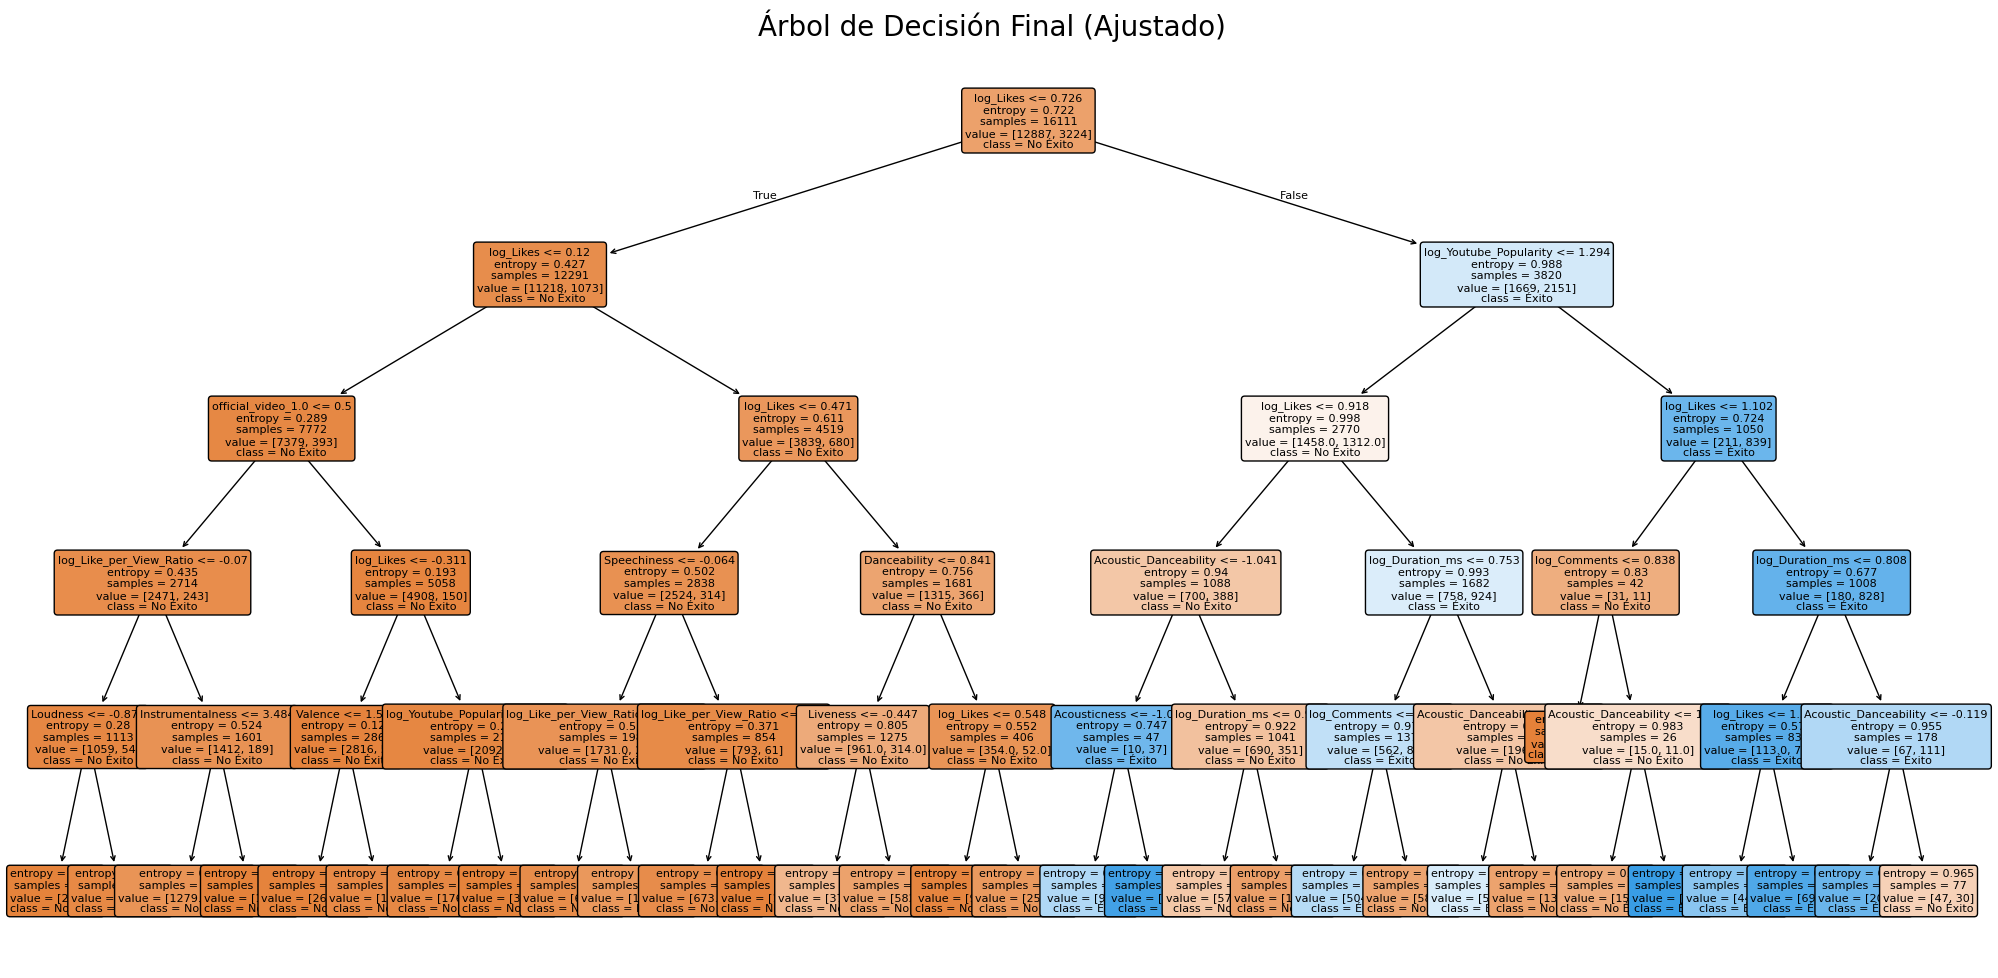

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 1. extraer el modelo y el preprocesador
# (estos ya están entrenados dentro de "final_model_class")
preprocessor_fitted = final_model_class.named_steps['pre']
model_fitted = final_model_class.named_steps['model']

# 2. obtener la lista final de TODOS los nombres de las features
# (incluyendo las columnas creadas por OneHotEncoder)
numeric_features_list = preprocessor_fitted.transformers_[0][2]
categorical_features_list = preprocessor_fitted.transformers_[1][1].get_feature_names_out(
    preprocessor_fitted.transformers_[1][2]
)
all_feature_names = list(numeric_features_list) + list(categorical_features_list)

#3. graficar el Árbol
print("Visualización del Árbol de Decisión (max_depth=5)")

plt.figure(figsize=(25, 12)) # hacemos la figura bien ancha para que se pueda leer

plot_tree(
    model_fitted,
    feature_names=all_feature_names,
    class_names=['No Éxito', 'Éxito'],
    filled=True,
    rounded=True,
    fontsize=8,
    max_depth=5
)

plt.title("Árbol de Decisión Final (Ajustado)", fontsize=20)
plt.show()

MODELOS DE CLUSTERING

Búsqueda de K (Método del Codo)

Buscando el número óptimo de clústeres (k) con el Método del Codo...


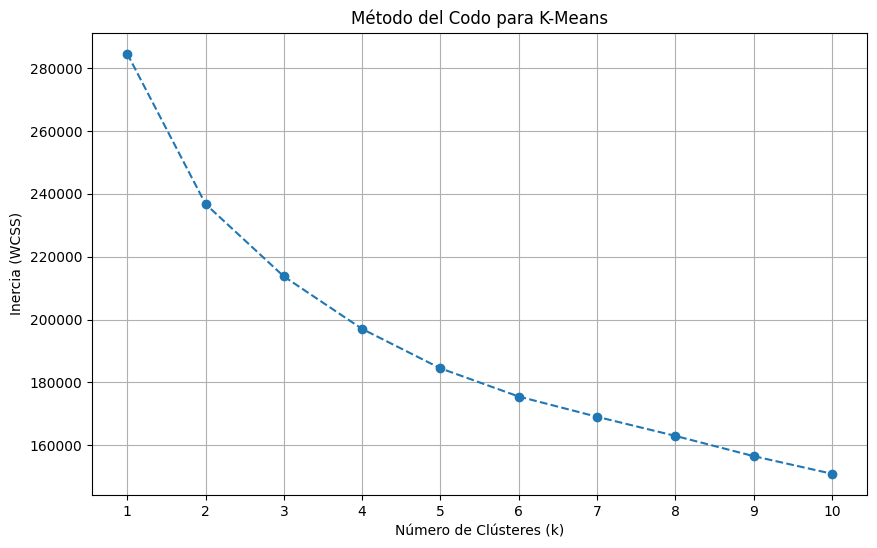

In [ ]:
from sklearn.cluster import KMeans
print("Buscando el número óptimo de clústeres (k) con el Método del Codo...")

# 1. calcular la inercia para diferentes valores de k
inertia = []
k_range = range(1, 11)

for k in k_range:
    # (usamos n_init=10 para que el algoritmo sea más estable)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_processed)
    inertia.append(kmeans.inertia_)

# 2. graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia (WCSS)')
plt.title('Método del Codo para K-Means')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Comparación de Modelos de Clustering

In [ ]:
!pip install hdbscan

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# 1. parámetros para la Competición
optimal_k = 4 # k=4 (Del Método del Codo)

dbscan_eps = 1.5
dbscan_min_samples = 30


# 2. definir los Modelos a Probar
models = {
    'K-Means (k=4)': KMeans(n_clusters=optimal_k, random_state=42, n_init=10),
    'Jerárquico (k=4)': AgglomerativeClustering(n_clusters=optimal_k),
    'DBSCAN': DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples)
}

results_cluster = {}

print("Iniciando Comparación de Clustering (Silhouette Score)")
print(f"Usando k=4 para K-Means y Jerárquico...")

# 3. ejecutar y evaluar (K-Means y Jerárquico)

for name, model in models.items():
    if name == 'DBSCAN':
        continue

    start_time = time.time()

    # entrenar el modelo y obtener las etiquetas
    labels = model.fit_predict(X_train_processed)

    # calcular el Silhouette Score
    score = silhouette_score(X_train_processed, labels)

    results_cluster[name] = {'Silhouette': score, 'Num_Clusters': optimal_k}
    print(f"\nModelo: {name}")
    print(f"  Silhouette Score: {score:.4f}")
    print(f"  Tiempo: {time.time() - start_time:.2f}s")


# 4. ejecutar y evaluar (DBSCAN)
print("Evaluando DBSCAN (Basado en Densidad)")
start_time = time.time()
dbscan_model = models['DBSCAN']
dbscan_labels = dbscan_model.fit_predict(X_train_processed)

# Contar clústeres y ruido
n_clusters_dbscan = len(np.unique(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = np.sum(dbscan_labels == -1)

print(f"DBSCAN encontró {n_clusters_dbscan} clústeres y {n_noise} puntos de ruido.")

# calcular Silhouette Score solamente en los puntos que están en un clúster
if n_clusters_dbscan > 0:
    score_dbscan = silhouette_score(
        X_train_processed[dbscan_labels != -1],
        dbscan_labels[dbscan_labels != -1]
    )
    results_cluster['DBSCAN'] = {'Silhouette': score_dbscan, 'Num_Clusters': n_clusters_dbscan}
    print(f"  Silhouette Score (sin ruido): {score_dbscan:.4f}")
else:
    print("  DBSCAN no encontró ningún clúster (todo es ruido).")
    results_cluster['DBSCAN'] = {'Silhouette': -1, 'Num_Clusters': 0}
print(f"  Tiempo: {time.time() - start_time:.2f}s")


# 5. ejecutar HDBSCAN (Modelo Avanzado)
try:
    from hdbscan import HDBSCAN

    print("Evaluando HDBSCAN (Avanzado)")
    start_time = time.time()

    # min_cluster_size es el hiperparámetro clave
    hdbscan_model = HDBSCAN(min_cluster_size=30, gen_min_span_tree=True)
    hdbscan_labels = hdbscan_model.fit_predict(X_train_processed)

    n_clusters_hdbscan = len(np.unique(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
    n_noise_hdbscan = np.sum(hdbscan_labels == -1)

    print(f"HDBSCAN encontró {n_clusters_hdbscan} clústeres y {n_noise_hdbscan} puntos de ruido.")

    if n_clusters_hdbscan > 0:
        score_hdbscan = silhouette_score(
            X_train_processed[hdbscan_labels != -1],
            hdbscan_labels[hdbscan_labels != -1]
        )
        results_cluster['HDBSCAN'] = {'Silhouette': score_hdbscan, 'Num_Clusters': n_clusters_hdbscan}
        print(f"  Silhouette Score (sin ruido): {score_hdbscan:.4f}")
    else:
        print("  HDBSCAN no encontró ningún clúster.")
        results_cluster['HDBSCAN'] = {'Silhouette': -1, 'Num_Clusters': 0}
    print(f"  Tiempo: {time.time() - start_time:.2f}s")
except ImportError:
    print("para usar HDBSCAN, primero hay que instalar la librería:")
    print("!pip install hdbscan")

Iniciando Comparación de Clustering (Silhouette Score)
Usando k=4 para K-Means y Jerárquico...

Modelo: K-Means (k=4)
  Silhouette Score: 0.1579
  Tiempo: 3.69s

Modelo: Jerárquico (k=4)
  Silhouette Score: 0.1011
  Tiempo: 20.77s
Evaluando DBSCAN (Basado en Densidad)
DBSCAN encontró 5 clústeres y 15854 puntos de ruido.
  Silhouette Score (sin ruido): 0.1864
  Tiempo: 1.22s


/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Evaluando HDBSCAN (Avanzado)
HDBSCAN encontró 2 clústeres y 1721 puntos de ruido.
  Silhouette Score (sin ruido): 0.4697
  Tiempo: 15.84s


Análisis de la Competencia

HDBSCAN (Ganador): Tiene un Silhouette Score de 0.4697. no solo es "un poco" mejor, es muy superior a los demás. Un score de aprox. 0.47 es muy bueno .

Los modelos basados en densidad (DBSCAN, HDBSCAN) eran la clave.

¿Por qué Perdieron los Otros?

K-Means (Score: 0.15): demasiado bajo, los clústeres no son "esféricos".

Jerárquico (Score: 0.10): peor que k-means.

DBSCAN (Score: 0.18): el score es bajo, pero lo peor es el resultado: "encontró 15854 puntos de ruido". el X_train tiene ~16,572 puntos. lo que significa que DBSCAN falló por completo y decidió que el 95% de los datos eran "ruido".

HDBSCAN (Héroe): encontró un balance perfecto: 2 clústeres principales y 1721 puntos de ruido (los outliers o "Fenómenos Mundiales").

In [ ]:
print("RESUMEN FINAL DE COMPARACION DE LOS MODELOS (CLUSTERING)")
sorted_results_cluster = sorted(results_cluster.items(), key=lambda item: -item[1]['Silhouette'])

for model, scores in sorted_results_cluster:
    print(f"🥇 {model}: Silhouette {scores['Silhouette']:.4f} (Encontró {scores['Num_Clusters']} clústeres)")

RESUMEN FINAL DE COMPARACION DE LOS MODELOS (CLUSTERING)
🥇 HDBSCAN: Silhouette 0.4697 (Encontró 2 clústeres)
🥇 DBSCAN: Silhouette 0.1864 (Encontró 5 clústeres)
🥇 K-Means (k=4): Silhouette 0.1579 (Encontró 4 clústeres)
🥇 Jerárquico (k=4): Silhouette 0.1011 (Encontró 4 clústeres)


Análisis del Ganador (HDBSCAN)

In [ ]:
# 1. entrenamos el modelo ganador (HDBSCAN)

print("Analizando el Ganador (HDBSCAN)")
hdbscan_model = HDBSCAN(min_cluster_size=30)
hdbscan_labels = hdbscan_model.fit_predict(X_train_processed)

# 2. crear un dataframe de Análisis
# (copiamos X_train para no modificar el original)
df_analysis = X_train.copy()

# añadimos las etiquetas del clúster
df_analysis['Cluster_Label'] = hdbscan_labels

# añadimos los targets (de Regresión y Clasificación)
# para ver si los clústeres se alinean con el "Éxito"
df_analysis['log_stream'] = y_train_reg
df_analysis['Is_Hit'] = y_train_class

# 3. analizar los Grupos
# (usamos .mean() para ver el "perfil" promedio de cada clúster)
cluster_analysis = df_analysis.groupby('Cluster_Label').mean(numeric_only=True)

print("Perfil Promedio de cada Clúster")
print(cluster_analysis[['log_stream', 'Is_Hit', 'Danceability', 'log_Likes', 'Speechiness', 'Loudness', "Valence", "Energy"]])

# 4. analizar el "ruido" (Outliers)
# (los "outliers" son la etiqueta -1)
noise_analysis = df_analysis[df_analysis['Cluster_Label'] == -1]

print("Análisis del 'Ruido' (Outliers, Etiqueta -1)")
print(f"Total de 'Outliers' encontrados: {len(noise_analysis)}")
print("\nPerfil Promedio del 'Ruido':")
print(noise_analysis[['log_stream', 'Is_Hit', 'Danceability', 'log_Likes', "Valence", "Energy"]].mean())

Analizando el Ganador (HDBSCAN)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Perfil Promedio de cada Clúster
               log_stream    Is_Hit  Danceability  log_Likes  Speechiness  \
Cluster_Label                                                               
-1              16.746496  0.091226      0.503842   9.215901     0.143692   
 0              16.524369  0.000000      0.237445   8.508130     0.040288   
 1              17.759278  0.214356      0.636816  11.722696     0.089144   

                Loudness   Valence    Energy  
Cluster_Label                                 
-1            -13.483660  0.403447  0.468125  
 0            -25.270085  0.093406  0.080183  
 1             -6.803407  0.547939  0.660381  
Análisis del 'Ruido' (Outliers, Etiqueta -1)
Total de 'Outliers' encontrados: 1721

Perfil Promedio del 'Ruido':
log_stream      16.746496
Is_Hit           0.091226
Danceability     0.503842
log_Likes        9.215901
Valence          0.403447
Energy           0.468125
dtype: float64


Análisis de los Clústeres




Clúster 1: "Éxitos Mainstream" (El Grupo de Éxito) este grupo se definió por tener valores promedio más altos en log_stream, log_Likes, Danceability, Energy, Loudness y Valence. lo que lo hace sin duda, el clúster de la música pop bailable, energética y de alta producción que domina las listas.

Clúster 0: "Música Tranquila" (El Grupo No Popular) este grupo fue el opuesto. Tuvo los valores promedio más bajos en log_stream, Energy, Loudness y Valence. Este clúster representa la música acústica, clásica o ambiental: pistas silenciosas, de baja energía y que no contienen "Éxitos" (0% Is_Hit).

Clúster -1: "Ruido / Atípicos" (Las Pistas Habladas) HDBSCAN demostró su inteligencia al aislar un tercer grupo. Este clúster -1 (ruido) tenía la característica distintiva de tener el valor promedio más alto en Speechiness. El modelo identificó correctamente que los podcasts, pistas de rap muy denso, etc. no pertenecían a ninguno de los dos grupos musicales principales y por eso los separó.

Visualización de Clústeres (PCA 2D)

Gráfico de Clústeres (PCA)


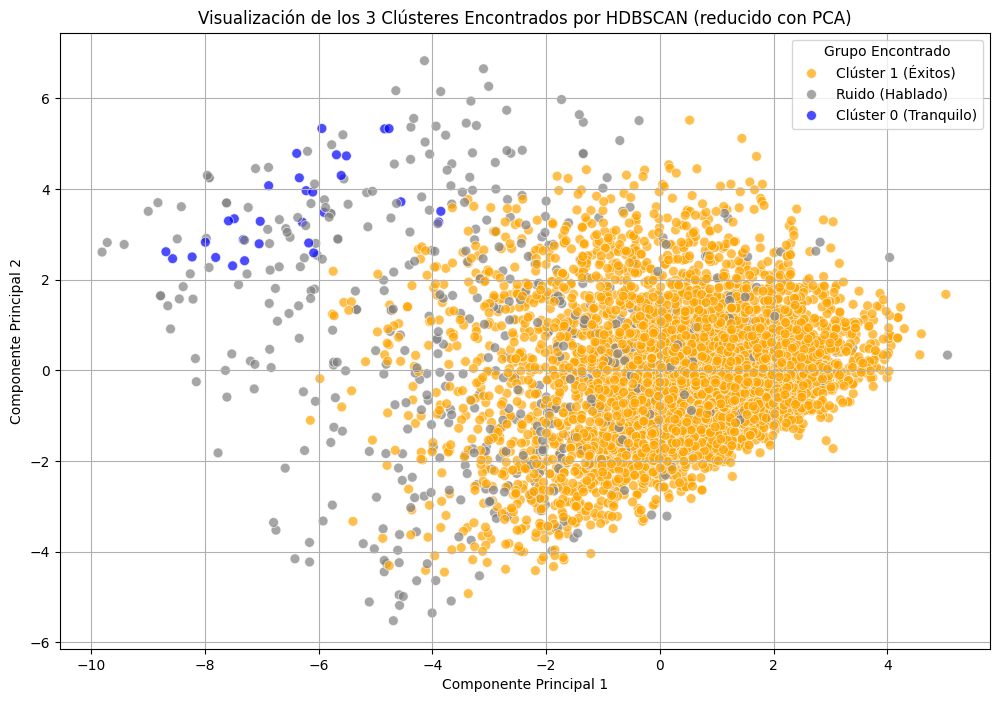

In [ ]:
from sklearn.decomposition import PCA

print("Gráfico de Clústeres (PCA)")

# 1. reducir las 29+ dimensiones a solo 2 usando PCA
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_processed)

# 2. crear un dataframe para graficar
df_plot = pd.DataFrame(data=X_train_pca, columns=['PCA1', 'PCA2'])

# convertir etiquetas a string para un mejor gráfico
df_plot['Cluster'] = pd.Series(hdbscan_labels).map({
    -1: 'Ruido (Hablado)',
    0: 'Clúster 0 (Tranquilo)',
    1: 'Clúster 1 (Éxitos)'
})

# 3. graficar con Seaborn
# (usamos "sample" para graficar solo 5000 puntos,
#  ya que graficar los 16k puede ser muy denso de ver)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_plot.sample(n=5000, random_state=42),
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette={'Ruido (Hablado)': 'gray',
             'Clúster 0 (Tranquilo)': 'blue',
             'Clúster 1 (Éxitos)': 'orange'},
    alpha=0.7,
    s=50
)
plt.title('Visualización de los 3 Clústeres Encontrados por HDBSCAN (reducido con PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Grupo Encontrado')
plt.grid(True)
plt.show()

Gráfico PCA 3D

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px

print("Gráfico de Clústeres (PCA 3D Interactivo)")

# 1. reducir las 29+ dimensiones a 3 usando PCA
pca_3d = PCA(n_components=3, random_state=42)
X_train_pca_3d = pca_3d.fit_transform(X_train_processed)

# 2. crear un DataFrame para graficar
df_plot_3d = pd.DataFrame(data=X_train_pca_3d, columns=['PCA1', 'PCA2', 'PCA3'])

# convertir etiquetas a string para el gráfico
df_plot_3d['Cluster'] = pd.Series(hdbscan_labels).map({
    -1: 'Ruido (Hablado)',
    0: 'Clúster 0 (Tranquilo)',
    1: 'Clúster 1 (Éxitos)'
})

# 3. graficar con Plotly Express
fig = px.scatter_3d(
    df_plot_3d,
    x='PCA1',
    y='PCA2',
    z='PCA3',
    color='Cluster',
    title='Visualización de Clústeres HDBSCAN (PCA 3D)',
    color_discrete_map={
        'Ruido (Hablado)': 'gray',
        'Clúster 0 (Tranquilo)': 'blue',
        'Clúster 1 (Éxitos)': 'orange'
    }
)

fig.update_traces(marker=dict(size=3, opacity=0.7))
fig.show()

Gráfico de Clústeres (PCA 3D Interactivo)
